# **Appendix: Training Code (headings t.1, t.2,...t.n)**

**t.1 Import Libararies**

In [0]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy.stats import gaussian_kde
import cv2
import pandas as pd
import matplotlib.image as mpimg
import scipy.misc
import glob 
import imageio
from cv2 import cvtColor



**t.2 Reading the Image using OpenCV**

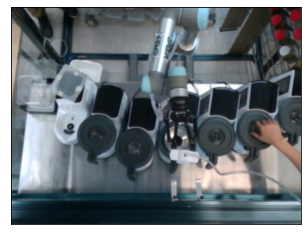

In [2]:
img = cv2.imread('vlcsnap-2020-03-28-13h17m52s091.png', 1)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img, interpolation = 'bicubic')
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

**t.3 Three dimentional Array img**

In [5]:
print("size of image")
print(np.size(img[:,0,0]))
print(np.size(img[0,:,0]))
print(np.size(img[0,0,:]))
print(img)

size of image
474
632
3
[[[ 47  43  35]
  [ 51  47  39]
  [ 49  45  39]
  ...
  [ 15  25  22]
  [ 16  28  24]
  [ 17  29  25]]

 [[ 36  32  24]
  [ 44  40  32]
  [ 50  46  40]
  ...
  [ 17  27  24]
  [ 18  30  26]
  [ 19  31  27]]

 [[ 23  24  16]
  [ 33  34  26]
  [ 44  42  38]
  ...
  [ 26  26  23]
  [ 24  31  26]
  [ 26  33  28]]

 ...

 [[ 23  46  55]
  [ 23  46  55]
  [ 23  44  53]
  ...
  [ 92 107 110]
  [ 93 108 111]
  [ 93 108 111]]

 [[ 25  48  57]
  [ 23  46  55]
  [ 21  44  53]
  ...
  [102 118 118]
  [102 118 118]
  [102 118 118]]

 [[ 22  45  54]
  [ 21  44  53]
  [ 20  43  52]
  ...
  [113 129 129]
  [113 129 129]
  [113 129 129]]]


**t.4 Unfolding the image and creating the dataframe, df**

In [9]:
unfolded = np.reshape(img, (299568,3))
np.savetxt('2darray.csv', unfolded, delimiter=',', fmt='%d')
df = pd.read_csv("imag_one.csv")
df

,r,g,b
0,47,43,35
1,51,47,39
2,49,45,39
3,53,49,43
4,46,41,40
...,...,...,...
299563,113,129,129
299564,113,129,129
299565,113,129,129
299566,113,129,129


**t.5 Scaling and mean centering df to evaluate X matrix**

In [10]:
features = ['r', 'g', 'b']
# Separating out the features
x = df.loc[:, features].values

# Standardizing the features
x = StandardScaler().fit_transform(x)
x

array([[-0.69530689, -0.92754251, -1.13070499],
       [-0.63067599, -0.86041993, -1.06428162],
       [-0.66299144, -0.89398122, -1.06428162],
       ...,
       [ 0.37110299,  0.51559294,  0.43024427],
       [ 0.37110299,  0.51559294,  0.43024427],
       [ 0.37110299,  0.51559294,  0.43024427]])

**t.6 PCA dimensional Reduction**

In [12]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, columns = ['t1','t2'])
principalDf

,t1,t2
0,-1.590702,0.294786
1,-1.476276,0.293711
2,-1.514317,0.274889
3,-1.399891,0.273815
4,-1.571554,0.240299
...,...,...
299563,0.760941,-0.060418
299564,0.760941,-0.060418
299565,0.760941,-0.060418
299566,0.760941,-0.060418


**t.7 t1-t2 plot**

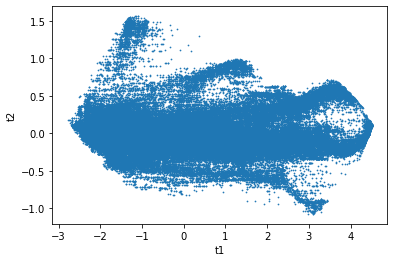

In [13]:
principalDf.plot.scatter(x= 't1', y= 't2', s= .5)

**t.8 data preparation**

In [0]:
t1 = principalDf['t1']
t1_min = t1.min()
t1_max = t1.max()
t1_unscaled = 255 * (t1 - t1_min)/(t1_max - t1_min)
t1_pixel = t1_unscaled.astype(int)
t2 = principalDf['t2']
t2_min = t2.min()
t2_max = t2.max()
t2_unscaled = 255 * (t2 - t2_min)/(t2_max - t2_min)
t2_pixel = t2_unscaled.astype(int)
A = t1_pixel.to_numpy()
B = np.reshape(A, (-1, 632))
C = t2_pixel.to_numpy()
D = np.reshape(C, (-1, 632))

**t.9 t1 score images**

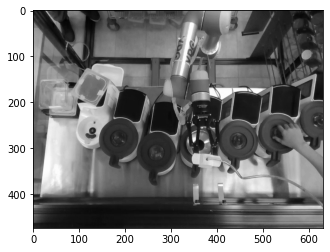

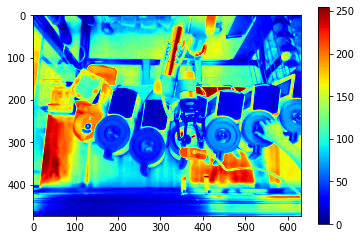

In [16]:
plt.imshow(B, cmap="gray")
plt.show()
plt.imshow(B, cmap="jet")
plt.colorbar()
plt.show()

**t.10 t2 score images**

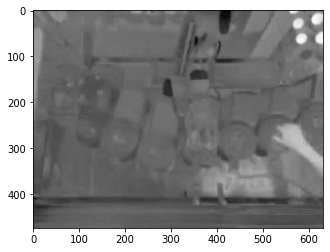

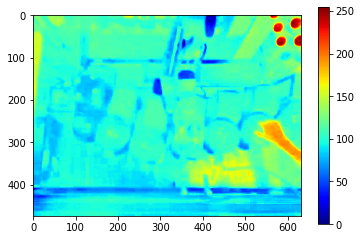

In [18]:
plt.imshow(D, cmap="gray")
plt.show()
plt.imshow(D, cmap="jet")
plt.colorbar()
plt.show()

**t.11 t1 vs t2 plot**

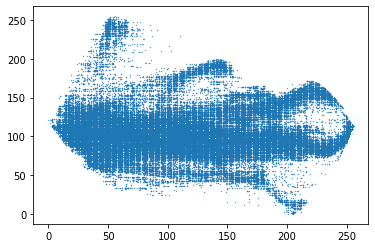

In [21]:
plt.scatter(x = t1_pixel, y = t2_pixel, s= 0.1)


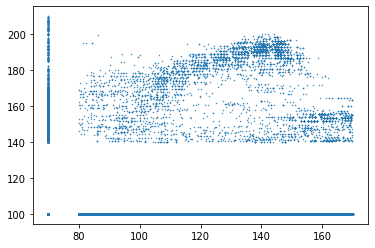

In [20]:
t1_within = t1_unscaled
t1_within[t1_within<80] = 70
t1_within[t1_within>170] = 70

t2_within = t2_unscaled
t2_within[t2_within<140] = 100
t2_within[t2_within>210] = 100

plt.scatter(x = t1_within, y = t2_within, s= 0.2)

**t.12 evaluating the loading vectors**

In [25]:
print("loading vectors")
print(pca.components_)

loading vectors
[[ 0.57310752  0.58165606  0.57725557]
 [ 0.78805296 -0.19797622 -0.58290475]]


**t.13 Further analysis**

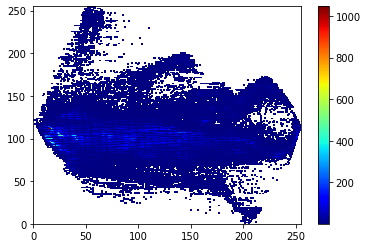

In [22]:
x1 = A
y1 = C
fig = plt.hist2d(x1, y1, (255, 255), cmap=plt.cm.jet, cmin = 1)
plt.colorbar()
plt.savefig('my_figure2.png')


In [0]:
inv_img_2d = pca.inverse_transform(principalDf)
inv_img_3d = np.reshape(inv_img_2d, (474, 632, 3))

In [0]:
inv_img_2d.shape

(299568, 3)

In [0]:
inv_img_3d

array([[[-0.67933634, -0.98360213, -1.09007381],
        [-0.6146048 , -0.91683283, -1.02339439],
        [-0.65123928, -0.93523352, -1.03438257],
        ...,
        [-1.19608012, -1.28671888, -1.30517777],
        [-1.17607997, -1.24986457, -1.26219045],
        [-1.15989708, -1.23317224, -1.2455206 ]],

       [[-0.85734809, -1.16721773, -1.27344221],
        [-0.727885  , -1.03367911, -1.14008337],
        [-0.63505639, -0.91854119, -1.01771271],
        ...,
        [-1.16371434, -1.25333423, -1.27183806],
        [-1.1437142 , -1.21647992, -1.22885074],
        [-1.12753131, -1.19978759, -1.21218089]],

       [[-1.06351834, -1.31508305, -1.39641726],
        [-0.90168948, -1.14815978, -1.22971871],
        [-0.73473951, -0.97605721, -1.05788709],
        ...,
        [-1.02648291, -1.24137314, -1.30927549],
        [-1.04868979, -1.19295286, -1.23374044],
        [-1.01632402, -1.15956821, -1.20040073]],

       ...,

       [[-1.08129038, -0.88352567, -0.79400379],
        [-1

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


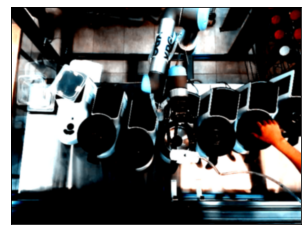

In [0]:
plt.imshow(inv_img_3d, interpolation = 'bicubic')
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

In [0]:
SPE_image = np.sqrt(np.square(np.reshape(x, (474, 632, 3)) - inv_img_3d))

In [0]:
SPE_image

array([[[0.01597055, 0.05605963, 0.04063119],
        [0.01607119, 0.0564129 , 0.04088724],
        [0.01175216, 0.0412523 , 0.02989906],
        ...,
        [0.01627399, 0.05712477, 0.04140319],
        [0.02011642, 0.0706124 , 0.05117882],
        [0.02014158, 0.07070071, 0.05124283]],

       [[0.01569379, 0.05508813, 0.03992706],
        [0.01589507, 0.05579467, 0.04043915],
        [0.01177732, 0.04134062, 0.02996307],
        ...,
        [0.01632432, 0.05730141, 0.04153121],
        [0.02016674, 0.07078903, 0.05130684],
        [0.0201919 , 0.07087735, 0.05137085]],

       [[0.01957397, 0.06870829, 0.04979875],
        [0.01982557, 0.06959148, 0.05043887],
        [0.00904056, 0.03173406, 0.02300038],
        ...,
        [0.00813622, 0.02855967, 0.02069963],
        [0.01824479, 0.06404262, 0.04641715],
        [0.01829511, 0.06421926, 0.04654517]],

       ...,

       [[0.00180193, 0.0063251 , 0.00458434],
        [0.00180193, 0.0063251 , 0.00458434],
        [0.00011902, 0

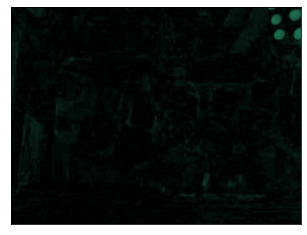

In [0]:
plt.imshow(SPE_image, interpolation = 'bicubic')
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

In [0]:
scaled_SPE = (SPE_image - SPE_image.min())/(SPE_image.max()-SPE_image.min())

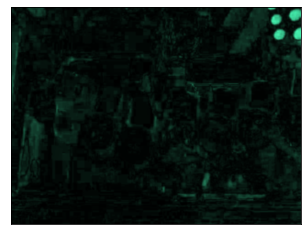

In [0]:
plt.imshow(scaled_SPE, interpolation = 'bicubic')
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

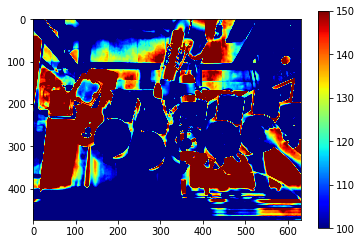

In [0]:
plt.imshow(B, cmap="jet", vmin = 100, vmax = 150)
plt.colorbar()
plt.show()

In [0]:
B[B<80] = 0
B[B>170] = 0

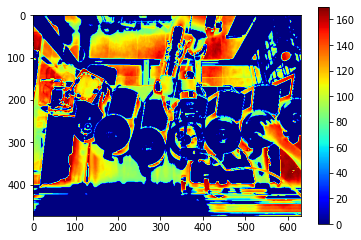

In [0]:
plt.imshow(B, cmap="jet")
plt.colorbar()
plt.show()

In [0]:
D[D<162] = 0
D[D>210] = 0

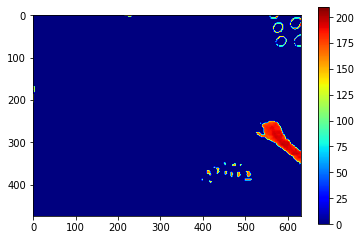

In [0]:
plt.imshow(D, cmap="jet")
plt.colorbar()
plt.show()

In [0]:
masked_image = np.zeros((474,632,3))
masked_image[:,:,0] = B
masked_image[:,:,1] = D
masked_image[:,:,2] = D


In [0]:
above_thresh = (masked_image[:,:,0] > 90) \
                & (masked_image[:,:,1] > 150) \
                & (masked_image[:,:,2] > 150)

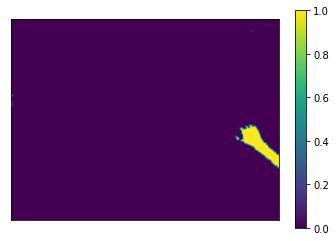

In [0]:
plt.imshow(above_thresh, interpolation = 'bicubic')
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.colorbar()
plt.show()

In [0]:
above_thresh

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [0]:
color_select = np.zeros_like(masked_image[:,:,0])
color_select[above_thresh] = 1

In [0]:
color_select

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

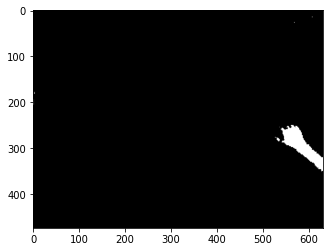

In [0]:
plt.imshow(color_select, cmap='gray')